In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory data analysis

In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### handling missing values

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [8]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [9]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### feature selection

In [10]:
data.drop('id',axis=1,inplace=True)

In [11]:
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [13]:
gender=enc.fit_transform(data['gender'])

In [14]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [15]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [16]:
data['work_type']=work_type

In [17]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [18]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Splitting the data for train and test

In [19]:
X=data.drop('stroke',axis=1)

In [20]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [21]:
Y=data['stroke']

In [22]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [24]:
X_test.shape

(1022, 10)

In [25]:
Y_test.shape

(1022,)

# Normalize

In [26]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [27]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# saving the scaler object

In [28]:
import pickle
import os


In [33]:
scaler_path=os.path.join('C:/Users/ayush/OneDrive/Desktop/stroke prediction','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [34]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

In [35]:
X_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ..., -0.12678509,
         1.38727506,  1.51158251],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.35586361,
         0.12078063, -1.28365994],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -0.83414241,
         0.00238781, -0.35191245],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ..., -1.08555387,
         1.17836876,  0.57983503],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.66056457,
         0.32968693, -0.35191245],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.75962556,
        -1.31545016, -1.28365994]])

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [37]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [38]:
dt.feature_importances_

array([0.03131014, 0.16462368, 0.0151659 , 0.02554551, 0.02550973,
       0.04767351, 0.03656417, 0.31521198, 0.27934296, 0.05905242])

In [39]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [40]:
Y_pred=dt.predict(X_test_std)

In [41]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [44]:
ac_dt

0.9060665362035225

In [45]:
import joblib
model_path=os.path.join('C:/Users/ayush/OneDrive/Desktop/stroke prediction','models/dt.sav')
joblib.dump(dt,model_path)

['C:/Users/ayush/OneDrive/Desktop/stroke prediction\\models/dt.sav']

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [47]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [48]:
Y_pred_lr=lr.predict(X_test_std)

In [49]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [51]:
ac_lr

0.9383561643835616

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [53]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [54]:
Y_pred=knn.predict(X_test_std)

In [55]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [56]:
ac_knn

0.9344422700587084

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [58]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [59]:
Y_pred=rf.predict(X_test_std)

In [60]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [61]:
ac_rf

0.9363992172211351

In [62]:
ac_knn

0.9344422700587084

In [63]:
ac_dt

0.9060665362035225

In [64]:
ac_lr

0.9383561643835616

# SVM

In [65]:
from sklearn.svm import SVC

In [66]:
sv=SVC()

In [67]:
sv.fit(X_train_std,Y_train)

SVC()

In [68]:
Y_pred=sv.predict(X_test_std)

In [69]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [70]:
ac_sv

0.9393346379647749

In [71]:
ac_lr

0.9383561643835616

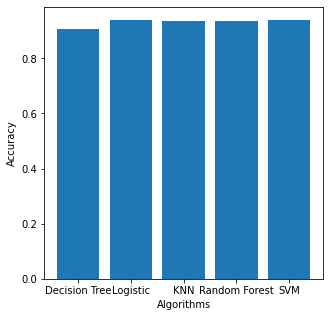

In [72]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()